
# Digit Classification with KNN


# Intro
---
In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
import sklearn
sklearn.__version__

'0.24.2'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
#X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False, as_frame=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Visualize a select sample of images
---
Show a 10x10 grid that visualizes 10 examples of each digit.

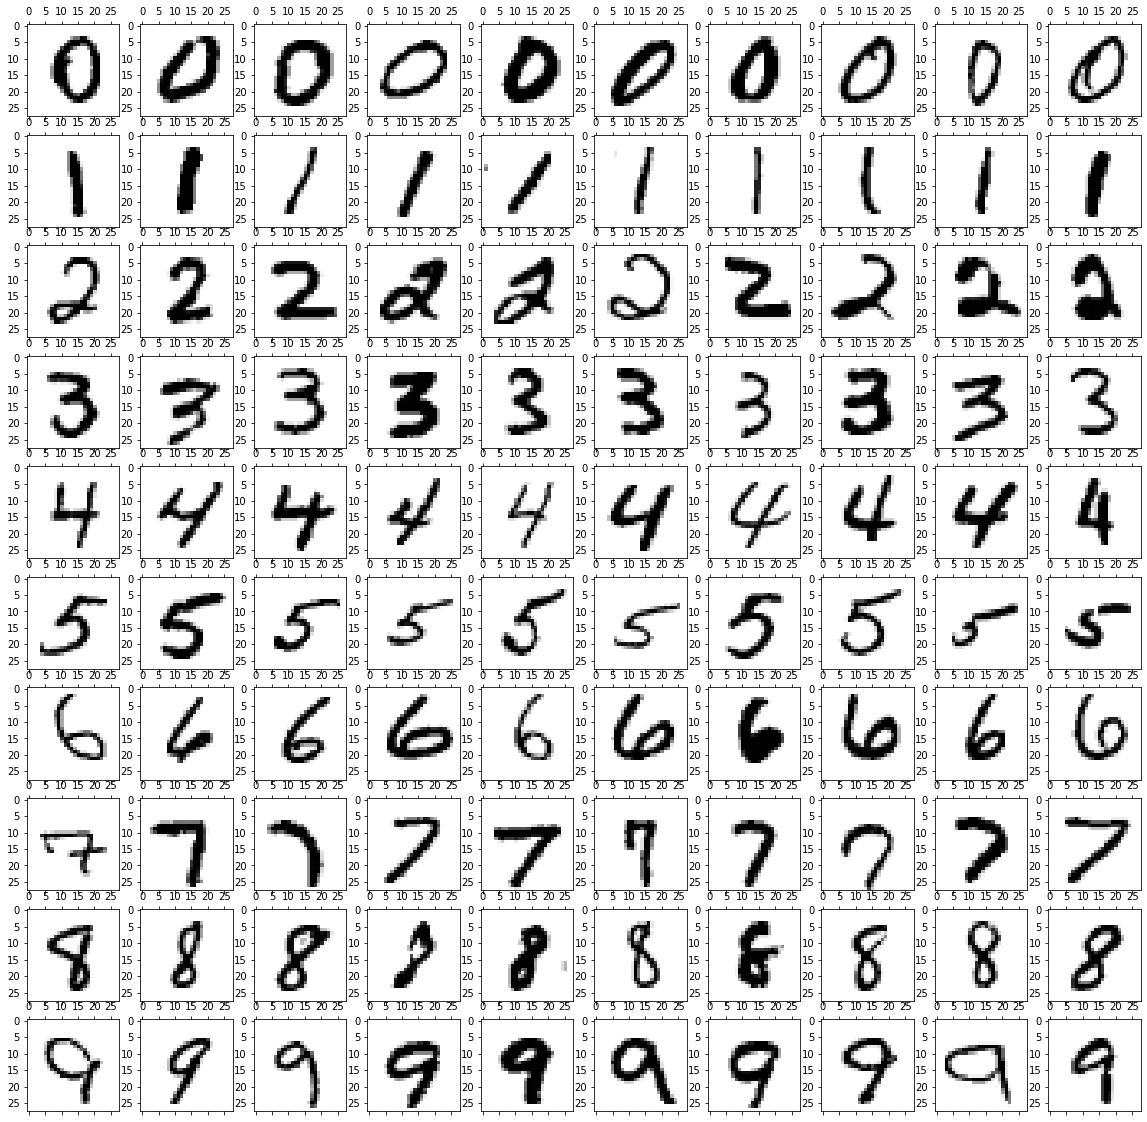

In [53]:
def Q1(num_examples=10):
  ### STUDENT START ###
    #create figure with 10x10 subplots
    fig, ax = plt.subplots(10,10, figsize = (20,20))
    #Pull in unique values of all labels in data Y (0-9)
    unique_labels = np.unique(Y)
    row_ind = 0
    #loop through 0-9 labels
    for i in unique_labels:
        #pull the indexes of the first 10 data points for the label i
        digit_set = np.where(train_labels == i)[0][:10]
        for j in range(0,len(digit_set)):
            #for all 10 valeus in the digit set, visualize each example, all in one row
            ax[row_ind][j].matshow(train_data[digit_set[j]].reshape(28,28), cmap = plt.cm.binary)
        #move to next row in 10x10 grid
        row_ind += 1
    plt.show()
  ### STUDENT END ###

Q1(10)

### Evaluating different choices of k
---

1. Produce k-Nearest Neighbors models with k = 1, 3, 5, 7, and 9.  
1. Print the accuracy of each model. 
1. Additionally, only for the 1-Nearest Neighbor model, show the precision, recall, and F1 for each label. 
1. Which digit is the most *difficult* for the 1-Nearest Neighbor model to classify correctly? How did you choose and why?

In [49]:
def Q2(k_values):

### STUDENT START ###
    #loop through all k values provided outside the 
    for i in k_values:
        #create KNN model with k = 1
        knn = KNeighborsClassifier(n_neighbors = i)
        #train the model on the mini training data provided
        knn.fit(mini_train_data, mini_train_labels)
        #use the score function to print the model accuracy
        print("When k = {}, the accuracy is: {:.3f}".format(i, knn.score(dev_data, dev_labels)))
        
    #re-create the 1 nearest neighbor model to print the classification report
    knn2 = KNeighborsClassifier(n_neighbors = 1)
    knn2.fit(mini_train_data, mini_train_labels)
    #use the generated model to predict on dev_data to be able to get classification report
    y_pred = knn2.predict(dev_data)
    print(classification_report(dev_labels, y_pred))
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
Q2(k_values)

When k = 1, the accuracy is: 0.884
When k = 3, the accuracy is: 0.876
When k = 5, the accuracy is: 0.882
When k = 7, the accuracy is: 0.877
When k = 9, the accuracy is: 0.875
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000



Answer to part 4: To answer this question I'm going to consider which label received the lowest recall score, because the question is specifically asking for which digit the model could not classify most frequently. From the classification report, we can see that the 1 nearest neighbor model had the hardest time classifying the digit 8. It got the lowest recall score of 0.77. 

### Examining the importance of training size
---
1. Produce 1-Nearest Neighbor models using training data of various sizes. For example, ```train_data[:train_size]```.
1. Evaluate and show the accuracy achieved by each model.  
1. Show the time needed to: 
  1. Train each model.
  1. Measure the accuracy of each model.
1. What do you see? Is this what you expected to see and why?
1. Plot on the same graph (as a function of training size):
  1. the time needed for training
  1. the time needed for calculating accuracy

For 100 samples, it took 0.0034 sec to train and 0.0482 sec to evaluate the model with 0.70 accuracy
For 200 samples, it took 0.0013 sec to train and 0.0326 sec to evaluate the model with 0.79 accuracy
For 400 samples, it took 0.0009 sec to train and 0.0309 sec to evaluate the model with 0.81 accuracy
For 800 samples, it took 0.0015 sec to train and 0.0421 sec to evaluate the model with 0.87 accuracy
For 1600 samples, it took 0.0064 sec to train and 0.0666 sec to evaluate the model with 0.91 accuracy
For 3200 samples, it took 0.0054 sec to train and 0.1187 sec to evaluate the model with 0.93 accuracy
For 6400 samples, it took 0.0127 sec to train and 0.2070 sec to evaluate the model with 0.94 accuracy
For 12800 samples, it took 0.0318 sec to train and 0.4331 sec to evaluate the model with 0.95 accuracy
For 25600 samples, it took 0.0685 sec to train and 0.8092 sec to evaluate the model with 0.96 accuracy


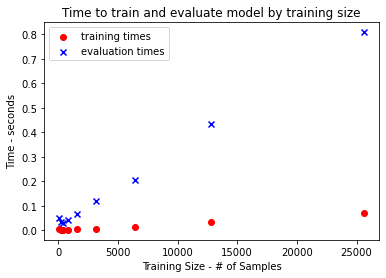

In [48]:
def Q3(train_sizes, accuracies, train_times, eval_times):

### STUDENT START ###
    knn3 = KNeighborsClassifier(n_neighbors = 1)
    #loop through all train sizes provided as an argument to the function
    for i in train_sizes:
        #subset the train_data based on the current value in input list
        sub_train_data = train_data[:i]
        sub_train_labels = train_labels[:i]
        
        #start train timing
        train_start = time.time()
        #fit model on the subset of training data
        knn3.fit(sub_train_data, sub_train_labels)
        train_end = time.time()
        
        #calculate train time 
        train_time = train_end - train_start
        train_times.append(train_time)
        
        #start eval timing
        eval_start = time.time()
        #evaluate model accuracy on dev_data
        cur_eval = knn3.score(dev_data, dev_labels)
        eval_end = time.time()
        
        #calculate eval time
        eval_time = eval_end - eval_start
        accuracies.append(cur_eval)
        eval_times.append(eval_time)
        #print out train time, eval time, model accuracy
        print("For {} samples, it took {:.4f} sec to train and {:.4f} sec to evaluate the model with {:.2f} accuracy".format(i, train_time, eval_time, cur_eval))
    
    #plot
    plt.scatter(train_sizes, train_times,
            color='red', marker='o', label='training times')
    plt.scatter(train_sizes, eval_times,
            color='blue', marker='x', label='evaluation times')
    plt.xlabel('Training Size - # of Samples')
    plt.ylabel('Time - seconds')
    plt.title('Time to train and evaluate model by training size')
    plt.legend(loc='upper left')
    plt.show()
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
train_times = []
eval_times = []
Q3(train_sizes, accuracies, train_times, eval_times)

Looking at this output graph, it isn't exactly what I was expecting. I assumed that both training time and evaluation time would increase as the training size increased, but the training time looks like it's remaining fairly constant throughout. In contrast, the evaluation time increases linearly as the training size increases. 

### Evaluating if we should obtain additional data
---

In this question we wish to predict what accuracy we would get if we had additional training data.

Our input, our features and labels, are the output from the previous question. Based on the training size and accuracy we got in the previous question, we wish to predict the accuracy we would get if we had larger training sizes.

1. Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. 
1. Print $R^2$ of the linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot on a lineplot graph:
  1. the actual accuracies we obtained in the previous question 
  1. and the accuracies our model predicted we would have gotten.
  1. The X axis is the training set size. 
  1. You can limit the range of X and Y to the range where you have data for both plots. Meaning, in the this question, we want to visualize how good the prediction is.
1. What are two things that are wrong with our model?
1. Apply a transformation to the predictor features and a transformation to the outcome that make the predictions fix these issues. 
1. Show $R^2$ of the improved linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot a lineplot graph of both again as before.
  1. Be sure to plot this where the Y axis is accuracy and X axis is training set size, **not the transformed space**!
  1. Choose the range of X and Y to visualize effectively.

The R^2 for the test set is 0.4177
The predicted accuracy for a training set size of [60000] is 1.2362
The predicted accuracy for a training set size of [120000] is 1.6374
The predicted accuracy for a training set size of [1000000] is 7.5225
The R^2 of the improved model is 0.9897
The improved model predicted accuracy for a training set size of [60000] is 1.0000000
The improved model predicted accuracy for a training set size of [120000] is 1.0000000
The improved model predicted accuracy for a training set size of [1000000] is 1.0000000


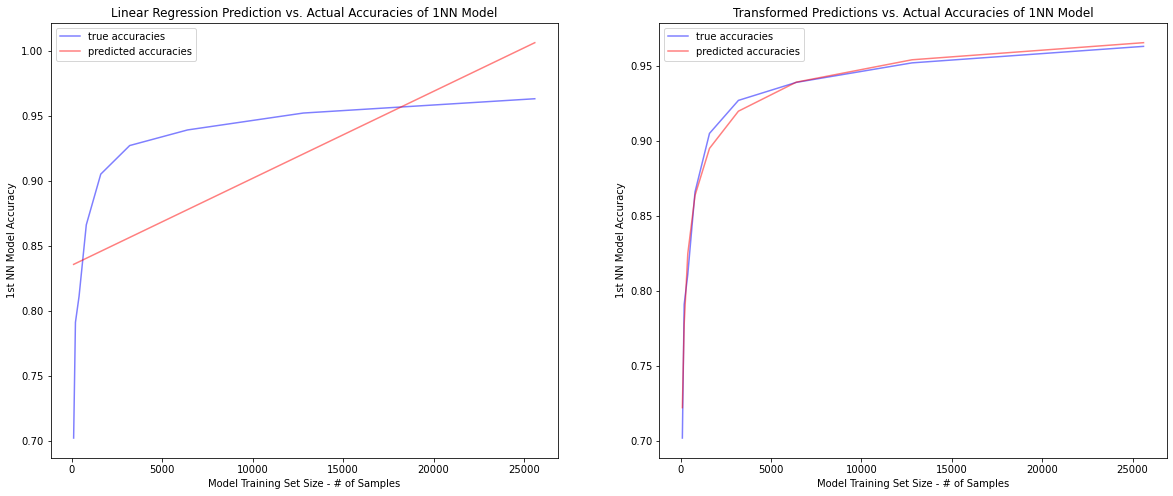

In [46]:
def Q4():
### STUDENT START ###
    #bring in the output from Q3 function for the inputs to our new model
    X = np.array(train_sizes)
    y = accuracies
    X = X.reshape(-1,1)
    
    #create linear regression model
    lr = LinearRegression().fit(X, y)
    
    #generate R2 score for fitted model on test data
    test_R2 = lr.score(X, y)
    print("The R^2 for the test set is {:.4f}".format(test_R2))
    
    #get predicted accuracies that we have existing values for (the ones used in Q3 functions)
    y_pred_exist = lr.predict(X)
    
    #predict accuracies for various training UNSEEN training sizes and print these
    sizes = np.array([60000, 120000, 1000000]).reshape(-1, 1)
    pred_vals = lr.predict(sizes)
    for i in range(0,len(sizes)):
        print("The predicted accuracy for a training set size of {} is {:.4f}".format(sizes[i], pred_vals[i]))

    #plot true accuracies against predicted
    #set up a 1x2 figure to plot original model next to improved model
    fig, ax = plt.subplots(1,2, figsize = (20,8))
    ax[0].plot(X, y,
            color='blue', alpha = 0.5, label='true accuracies')
    ax[0].plot(X, y_pred_exist,
            color='red', alpha = 0.5, label='predicted accuracies')
    ax[0].set_xlabel('Model Training Set Size - # of Samples')
    ax[0].set_ylabel('1st NN Model Accuracy')
    ax[0].set_title('Linear Regression Prediction vs. Actual Accuracies of 1NN Model')
    ax[0].legend(loc='upper left')

    
    #make transformations to data
    #apply the logit function to the accuracy values to convert them from probabilities (0,1) to numbers (-inf,inf)
    pred_trans = [np.log(p/(1-p)) for p in y]
    #take the log of the training sizes and reshape the 1D feature vector into a 2D matrix for the fit function
    inp_trans = [np.log(j) for j in X]
    inp_trans = np.array(inp_trans).reshape(-1,1)
    
    #create improved linear regression model and generate R2 score
    lr_t = LinearRegression().fit(inp_trans, pred_trans)
    R2_trans = lr_t.score(inp_trans, pred_trans)
    print("The R^2 of the improved model is {:.4f}".format(R2_trans))
    
    #get new predicted values on transformed input variables
    y_pred_2 = lr_t.predict(inp_trans)
    #apply the expit function to the output to convert the values back from numbers to probabilities
    #this will prevent the predicted accuracies from being outside the range of (0,1)
    y_pred_2_trans = [1/(1 + np.exp(-i)) for i in y_pred_2]
    
    #predict values for unseen training sizes and transform the output variable same as above
    pred_new = lr_t.predict(sizes)
    pred_trans_out = [1/(1 + np.exp(-i)) for i in pred_new]
    for i in range(0,len(sizes)):
        print("The improved model predicted accuracy for a training set size of {} is {:.7f}".format(sizes[i], pred_trans_out[i]))

    #plot true accuracies against predicted for the improved model
    ax[1].plot(X, y,
            color='blue', alpha = 0.5, label='true accuracies')
    ax[1].plot(X, y_pred_2_trans,
            color='red', alpha = 0.5, label='predicted accuracies')
    ax[1].set_xlabel('Model Training Set Size - # of Samples')
    ax[1].set_ylabel('1st NN Model Accuracy')
    ax[1].set_title('Transformed Predictions vs. Actual Accuracies of 1NN Model')
    ax[1].legend(loc='upper left')

    plt.show()

### STUDENT END ###

Q4()

The first, most clear problem with our model is that it that the plot of the true accuracies is not linear with respect to the model training size, so our predicted values are not very accurate. This is also evident by the relatively low R^2 score. The second problem is that because we are using a linear model, it can and will produce predictions that are outside the range of 0-1. Because we're measuring model accuracy, we want to stay inside this limit. To remediate this issue, we can first take the logit of the accuracy variables BEFORE prediction, changing from probabilities to numbers. After prediction, we will then invert the outcome back from numbers to probabilities using the expit function. Doing this both increased the R2 score and kept the predicted accuracy values from going beyond 1.

### Getting to know the confusion matrix.
---

1. Produce a 1-Nearest Neighbor model.
1. Show the confusion matrix. 
1. Which digit does the model most often confuse with which digit? (*for example, the model most often mistakes the digit $1$ as the digit $7$*).
1. Show examples of the misclassified digit.

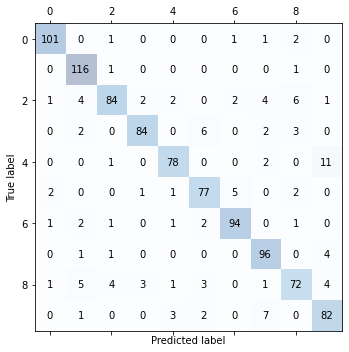

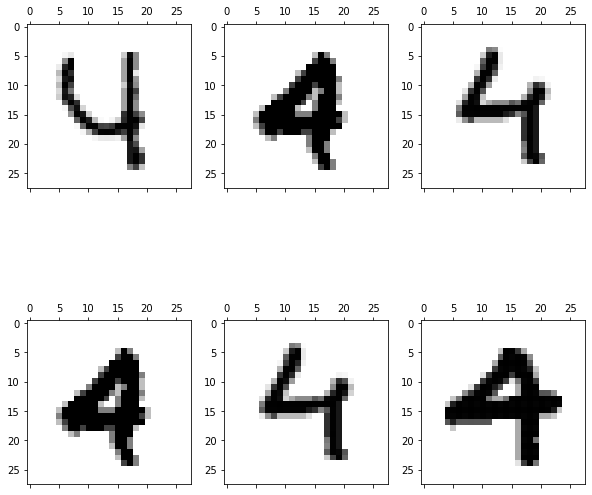

In [6]:
def Q5():

### STUDENT START ###
    #create 1nn model and generate confusion matrix
    knn5 = KNeighborsClassifier(n_neighbors = 1)
    knn5.fit(mini_train_data, mini_train_labels)
    y_pred = knn5.predict(dev_data)
    conf_matrix = confusion_matrix(dev_labels, y_pred)
    
    #Plot the confusion matrix
    #Credit to the knn_classifier in class notebook
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()
    
    #The confusion matrix showed that the model most often mistakes the digit 4 as the digit 9 
    #This code prints some examples of the confused digit
    #created 2 empty lists that will store the indexes in the dev data that were confused
    #this list will store dev_data indexes that were predicted as 4 but were really 9
    four_s_nine = []
    for j in range(0,len(dev_labels)):
        if dev_labels[j] == '4' and y_pred[j] == '9':
            four_s_nine.append(j)
    
    #set plot figure to 2x3 because from confusion matrix we saw the 9_s_4 only had 3 values
    fig, ax = plt.subplots(2,3, figsize = (10,10))
    for k in range(0,2):
        for i in range(0,3):
            ax[k][i].matshow(dev_data[four_s_nine[i+k]].reshape(28,28), cmap = plt.cm.binary)
    '''
    for k in range(0,len(nine_s_four)):
        #render the matrix at the index from our generated list
        ax[0][k].matshow(dev_data[nine_s_four[k]].reshape(28,28), cmap = plt.cm.binary)
    for i in range(0,len(nine_s_four)):
        #render the matrix at the index from our generated list
        ax[1][i].matshow(dev_data[four_s_nine[i]].reshape(28,28), cmap = plt.cm.binary)
    '''
    plt.show()

### STUDENT END ###

Q5()


According to the confusion matrix, the model most often mistakes the digit 4 as the digit 9, this pairing has a total of 11 errors. The most out of any other in the matrix.